In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [2]:
s = pd.read_csv('f1_summary_few_shot.csv')
ft = pd.read_csv('f1_summary_fine_tuning_few_shot.csv')

In [3]:
s['n_images'] = s['Unnamed: 0'].apply(lambda x: int(x.split('_')[4]))
s['sample'] = s['Unnamed: 0'].apply(lambda x: int(x.split('_')[-1].strip('.h5')))
s.sort_values(by='n_images', inplace=True)

ft['n_images'] = ft['Unnamed: 0'].apply(lambda x: int(x.split('_')[6]))
ft['sample'] = ft['Unnamed: 0'].apply(lambda x: int(x.split('_')[-1].strip('.h5')))
ft.sort_values(by='n_images', inplace=True)

In [4]:
merged = ft.merge(s, how='outer', on=['n_images', 'sample']).sort_values(by='n_images')

In [5]:
datasets = {'s':s, 'ft':ft}

In [6]:
metrics = {'s':{},'ft':{}}
meas = 4
for dk in datasets.keys():
    d = datasets[dk]
    n_images = np.unique(d['n_images'])
    for ni in n_images:
        if dk == 's':
            metrics['s'][str(ni)] = np.array([np.nan]*meas)
            metrics['s'][str(ni)][0:len(d[d['n_images']==ni]['F1_test'].values)] \
            = d[d['n_images']==ni]['F1_test'].values
        elif dk == 'ft':
            metrics['ft'][str(ni)] = np.array([np.nan]*meas)
            metrics['ft'][str(ni)][0:len(d[d['n_images']==ni]['F1_test'].values)] \
            = d[d['n_images']==ni]['F1_test'].values

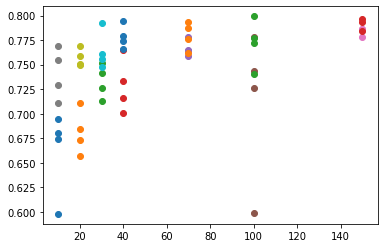

In [7]:
for mk in metrics.keys():
    for mdk in metrics[mk].keys():
        plt.scatter([int(mdk)]*len(metrics[mk][mdk]), metrics[mk][mdk])

In [8]:
metrics['ft'], metrics['s']

({'10': array([0.75499554, 0.7690219 , 0.72879416, 0.71036078]),
  '20': array([0.7509147 , 0.75864212, 0.7693706 , 0.74926094]),
  '30': array([0.76108315, 0.74723144, 0.7927137 , 0.75588615]),
  '40': array([0.79463184, 0.7735559 , 0.76618163, 0.7791515 ]),
  '70': array([0.78745015, 0.77591987, 0.79381457, 0.76158345]),
  '100': array([0.77711575, 0.77211316, 0.74013278, 0.79924612]),
  '150': array([0.78389444, 0.79302845, 0.79676328,        nan])},
 {'10': array([0.59786299, 0.69440557, 0.68074554, 0.67396991]),
  '20': array([0.7104074 , 0.68390209, 0.65667804, 0.67345177]),
  '30': array([0.75119347, 0.74156676, 0.71290623, 0.72656047]),
  '40': array([0.7643477 , 0.73327703, 0.70114333, 0.71627923]),
  '70': array([0.75823544, 0.77815088, 0.76456176, 0.76380383]),
  '100': array([0.74361198, 0.72644994, 0.5991108 , 0.77811937]),
  '150': array([0.7778792 , 0.78628149, 0.78622415,        nan])})

In [9]:
merged = ft.merge(s, how='outer').sort_values(by='n_images').rename(columns={'Unnamed: 0':'model_name'})
merged['model_name'] = merged['model_name'].apply(lambda x: 'fine_tuned' if 'y' in x else 'scratch')
#merged = merged[merged['n_images'] != 150]

In [10]:
n_images_plot = np.array([ 10,  20,  30,  40, 70, 100, 150])

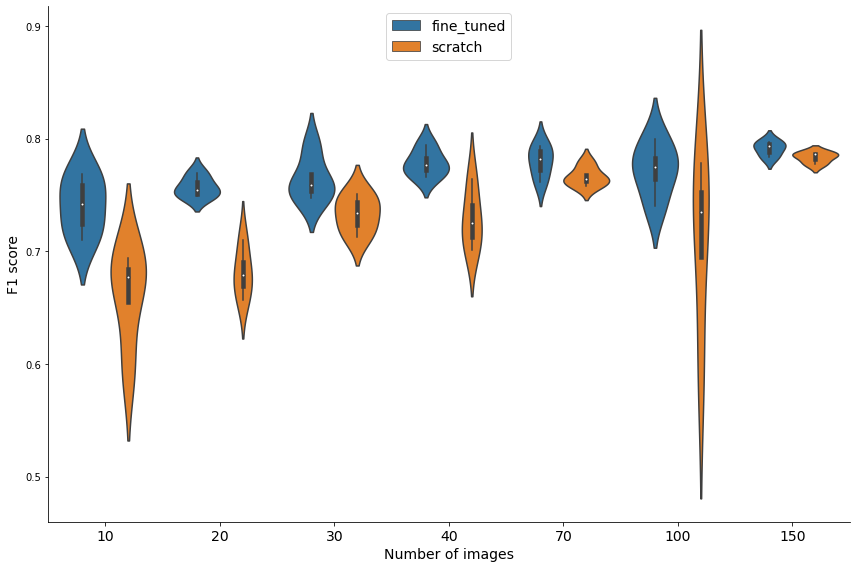

In [11]:
fig, ax = plt.subplots(1,figsize=(12, 8))
sns.violinplot(data=merged, x="n_images", y="F1_test", hue="model_name")
ax.set_xticklabels(n_images_plot, fontsize = 14)
#ax.set_yticklabels([0.5,0.6,0.7,0.8,0.9], fontsize = 14)

ax.set_xlabel('Number of images', fontsize=14)
ax.set_ylabel('F1 score', fontsize=14)
sns.despine()
fig.tight_layout()
plt.legend(fontsize=14, loc = 'upper center')
plt.savefig('f1_score_comparison.png')
#plt.show()

In [13]:
sns.set(font_scale = 1)

In [547]:
len(n_images_plot)//2

3

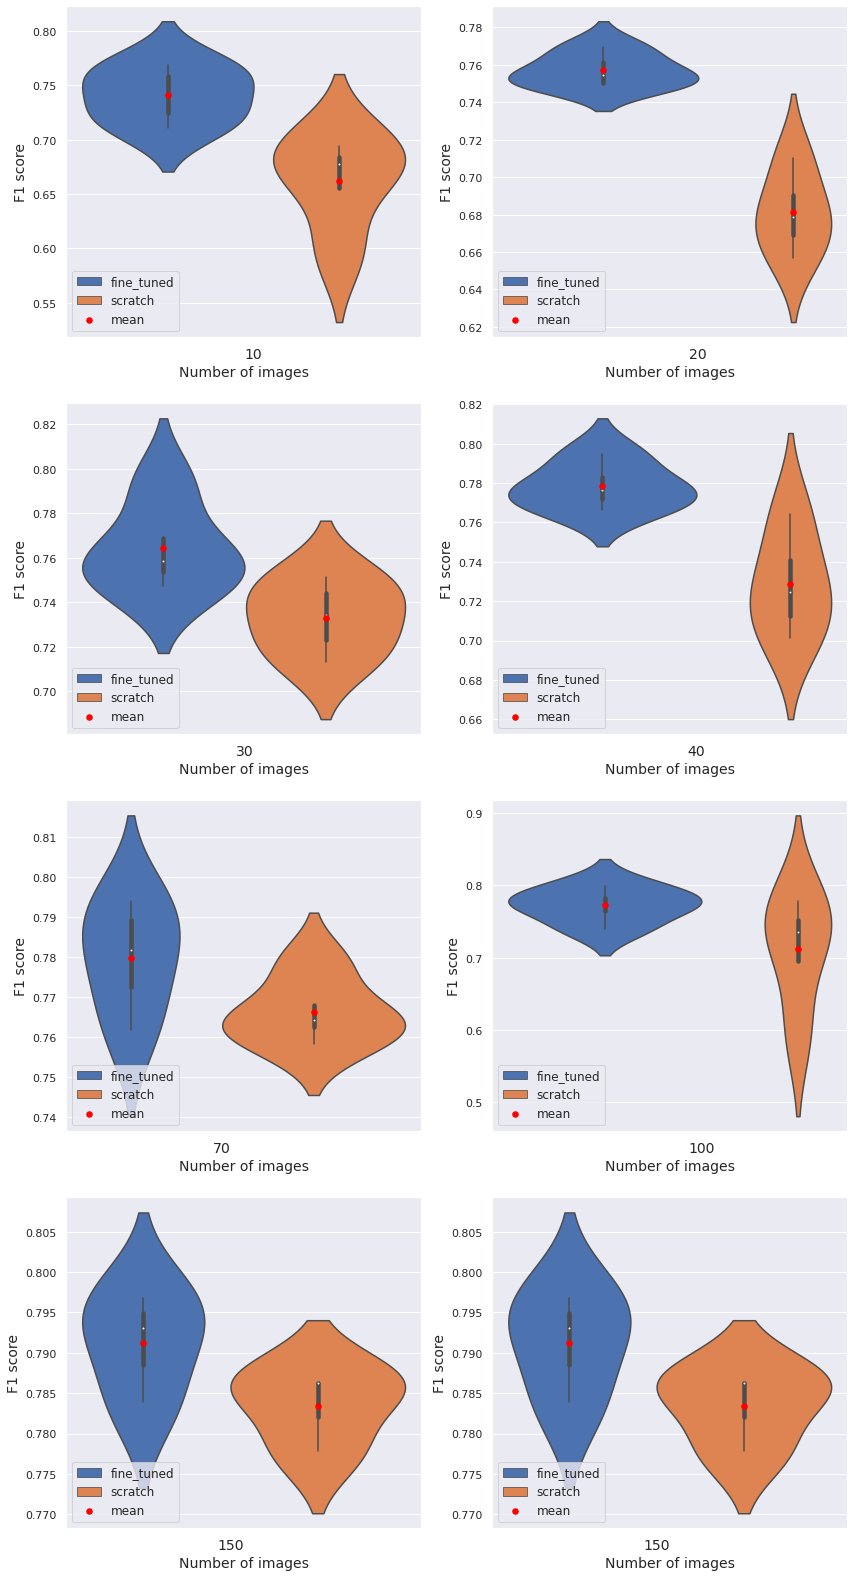

In [14]:
fig, ax = plt.subplots(4,2,figsize=(14, 28))
merged = merged.sort_values('model_name')

ft_means = []
ft_medians = []
ft_std = []

s_means = []
s_medians = []
s_std = []

#my_pal = {"versicolor": "g"}
for ix in range((len(n_images_plot)//2)+1):
    
    if ix != 3:
        points = merged[merged['n_images']== n_images_plot[ix*2]]
        #mean = np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values)
        ax[ix, 0] = sns.violinplot(data=points, hue="model_name"
                       , x="n_images", y="F1_test", saturation=1, ax=ax[ix, 0])

        ax[ix, 0].scatter([-0.2], 
                          np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3)
        ax[ix, 0].scatter([0.2], 
                          np.mean(points[points['model_name']=='scratch']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3, label='mean')
        ax[ix, 0].legend(loc='lower left', fontsize=12)
        ax[ix, 0].set_xlabel('Number of images', fontsize=14)
        ax[ix, 0].set_ylabel('F1 score', fontsize=14)
        ax[ix, 0].set_xticklabels([n_images_plot[ix*2]], fontsize = 14)

        s_means.append(np.mean(points[points['model_name']=='scratch']['F1_test'].values))
        s_medians.append(np.median(points[points['model_name']=='scratch']['F1_test'].values))
        ft_means.append(np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values))
        ft_medians.append(np.median(points[points['model_name']=='fine_tuned']['F1_test'].values))

        s_std.append(np.std(points[points['model_name']=='scratch']['F1_test'].values))
        ft_std.append(np.std(points[points['model_name']=='fine_tuned']['F1_test'].values))
        ####################### second plot ######################
        points = merged[merged['n_images']== n_images_plot[ix*2+1]]
        sns.violinplot(data=points, hue="model_name"
                       , x="n_images", y="F1_test", saturation=1, ax=ax[ix, 1])
        ax[ix, 1].scatter([-0.2], 
                          np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3)
        ax[ix, 1].scatter([0.2], 
                          np.mean(points[points['model_name']=='scratch']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3, label='mean')
        ax[ix, 1].legend(loc='lower left', fontsize=12)

        ax[ix, 1].set_xlabel('Number of images', fontsize=14)
        ax[ix, 1].set_ylabel('F1 score', fontsize=14)
        ax[ix, 1].set_xticklabels([n_images_plot[ix*2+1]], fontsize = 14)

        s_means.append(np.mean(points[points['model_name']=='scratch']['F1_test'].values))
        s_medians.append(np.median(points[points['model_name']=='scratch']['F1_test'].values)) 
        ft_means.append(np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values))   
        ft_medians.append(np.median(points[points['model_name']=='fine_tuned']['F1_test'].values)) 

        s_std.append(np.std(points[points['model_name']=='scratch']['F1_test'].values))
        ft_std.append(np.std(points[points['model_name']=='fine_tuned']['F1_test'].values))
    else:
        points = merged[merged['n_images']== n_images_plot[ix*2]]
        #mean = np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values)
        ax[ix, 0] = sns.violinplot(data=points, hue="model_name"
                       , x="n_images", y="F1_test", saturation=1, ax=ax[ix, 0])

        ax[ix, 0].scatter([-0.2], 
                          np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3)
        ax[ix, 0].scatter([0.2], 
                          np.mean(points[points['model_name']=='scratch']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3, label='mean')
        ax[ix, 0].legend(loc='lower left', fontsize=12)
        ax[ix, 0].set_xlabel('Number of images', fontsize=14)
        ax[ix, 0].set_ylabel('F1 score', fontsize=14)
        ax[ix, 0].set_xticklabels([n_images_plot[ix*2]], fontsize = 14)

        s_means.append(np.mean(points[points['model_name']=='scratch']['F1_test'].values))
        s_medians.append(np.median(points[points['model_name']=='scratch']['F1_test'].values))
        ft_means.append(np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values))
        ft_medians.append(np.median(points[points['model_name']=='fine_tuned']['F1_test'].values))

        s_std.append(np.std(points[points['model_name']=='scratch']['F1_test'].values))
        ft_std.append(np.std(points[points['model_name']=='fine_tuned']['F1_test'].values))
        
        ####################### second plot ######################
        points = merged[merged['n_images']== n_images_plot[ix*2]]
        sns.violinplot(data=points, hue="model_name"
                       , x="n_images", y="F1_test", saturation=1, ax=ax[ix, 1])
        ax[ix, 1].scatter([-0.2], 
                          np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3)
        ax[ix, 1].scatter([0.2], 
                          np.mean(points[points['model_name']=='scratch']['F1_test'].values)
                         ,color='red',marker='o',s=30, zorder=3, label='mean')
        ax[ix, 1].legend(loc='lower left', fontsize=12)

        ax[ix, 1].set_xlabel('Number of images', fontsize=14)
        ax[ix, 1].set_ylabel('F1 score', fontsize=14)
        ax[ix, 1].set_xticklabels([n_images_plot[ix*2]], fontsize = 14)

        s_means.append(np.mean(points[points['model_name']=='scratch']['F1_test'].values))
        s_medians.append(np.median(points[points['model_name']=='scratch']['F1_test'].values)) 
        ft_means.append(np.mean(points[points['model_name']=='fine_tuned']['F1_test'].values))   
        ft_medians.append(np.median(points[points['model_name']=='fine_tuned']['F1_test'].values)) 

        s_std.append(np.std(points[points['model_name']=='scratch']['F1_test'].values))
        ft_std.append(np.std(points[points['model_name']=='fine_tuned']['F1_test'].values))
    
plt.savefig('subplots_violin.png')
plt.show()

In [15]:
ft_means,ft_medians, ft_std

([0.7407930937213896,
  0.7570470907714683,
  0.7642286087551724,
  0.7783802164667146,
  0.7796920086895801,
  0.7721519527402019,
  0.7912287232770362,
  0.7912287232770362],
 [0.7418948474228392,
  0.7547784113610947,
  0.7584846509740747,
  0.7763537010757342,
  0.781685007420686,
  0.7746144543729809,
  0.7930284512739176,
  0.7930284512739176],
 [0.02274134310233116,
  0.007947379627772859,
  0.01717407025065331,
  0.010449757719481013,
  0.012265644168555476,
  0.021118487119397154,
  0.0054056135598186394,
  0.0054056135598186394])

In [16]:
s_means,s_medians, s_std

([0.6617460043342652,
  0.6811098260397888,
  0.7330567289079163,
  0.7287618222182384,
  0.7661879770607479,
  0.7118230235041523,
  0.7834616138498265,
  0.7834616138498265],
 [0.6773577271874787,
  0.6786769310720364,
  0.7340636118862902,
  0.724778129789083,
  0.764182794439086,
  0.7350309593541241,
  0.7862241475493965,
  0.7862241475493965],
 [0.03761014700779471,
  0.0195045044399116,
  0.014574000851787646,
  0.023480513312924303,
  0.007326028466266934,
  0.0676825964990094,
  0.003947432752226609,
  0.003947432752226609])

In [507]:
green_f1_mean = s_means
green_f1_ft_mean = ft_means

green_f1_std_N =  s_std
green_f1_ft_std_N = ft_std

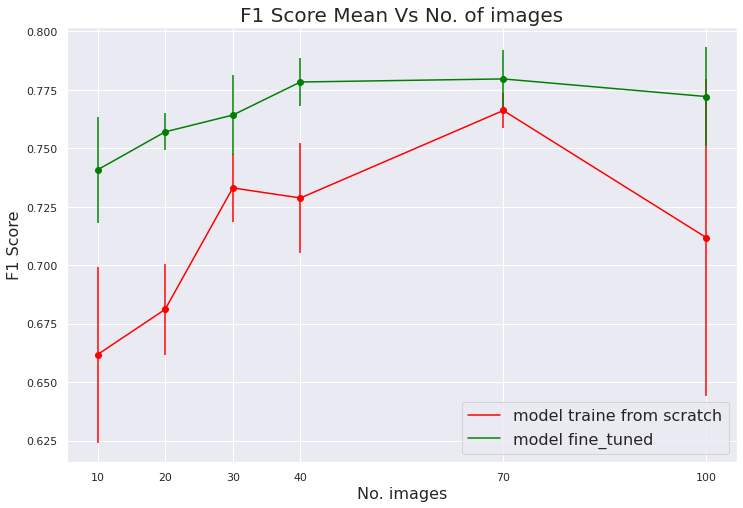

In [508]:
plt.figure(figsize=(12, 8))

plt.title('F1 Score Mean Vs No. of images', fontsize=20)
plt.xlabel('No. images', fontsize=16)
plt.ylabel('F1 Score', fontsize=16)

plt.plot(n_images_plot,green_f1_mean, label='model traine from scratch', color = 'red')
plt.plot(n_images_plot,green_f1_ft_mean, label='model fine_tuned', color = 'green')

plt.errorbar(n_images_plot, green_f1_mean, yerr= green_f1_std_N,
               fmt='o', color = 'red')
plt.errorbar(n_images_plot, green_f1_ft_mean, yerr= green_f1_ft_std_N,
               fmt='o', color = 'green')

plt.xticks(n_images_plot)

plt.legend(loc='lower right', fontsize=16)

fig.savefig('f1_score_comparison.png')

[Text(0, 0, '10'),
 Text(1, 0, '20'),
 Text(2, 0, '30'),
 Text(3, 0, '40'),
 Text(4, 0, '100')]

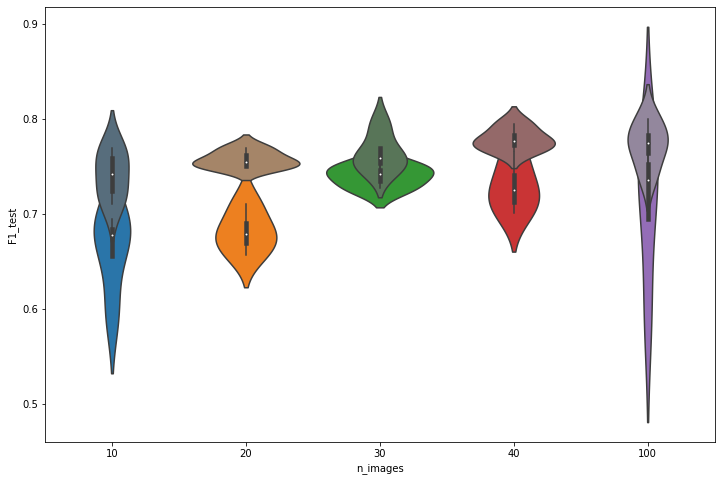

In [207]:
fig, ax = plt.subplots(6,2,figsize=(12, 8))

for nip in n_images_plot:
    sns.violinplot(data=s[(s['n_images']!= 70) & (s['n_images']!= 150)]
                   , x="n_images", y="F1_test", saturation=0.85)
    #ax.set_xticklabels(n_images_plot)
    sns.violinplot(data=ft[(ft['n_images']!= 70) & (ft['n_images']!= 150)]
                   , x="n_images", y="F1_test", saturation=0.25)
    #ax.set_xticklabels(n_images_plot)


In [ ]:
s_means=[]
for ni in n_images_plot:
    s_means.append((s[s['n_images']== ni]['F1_test'].mean()))

ft_means=[]
for ni in n_images_plot:
    ft_means.append(ft[ft['n_images']== ni]['F1_test'].mean())